In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdena')
from mglearn.make_blobs import make_blobs

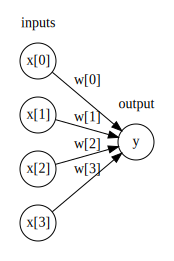

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

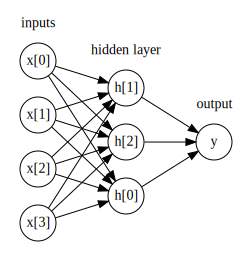

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0,0.5,'relu(x), tanh(x)')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


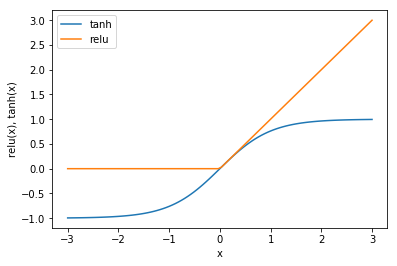

In [15]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

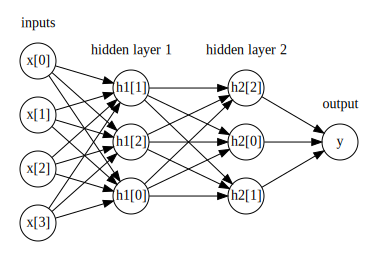

In [16]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0,0.5,'Признак 1')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


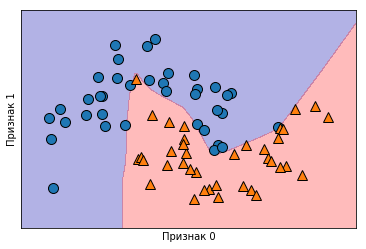

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

Text(0,0.5,'Признак 1')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


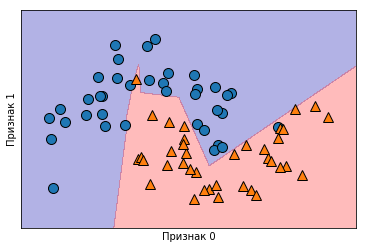

In [19]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=10)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

Text(0,0.5,'Признак 1')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


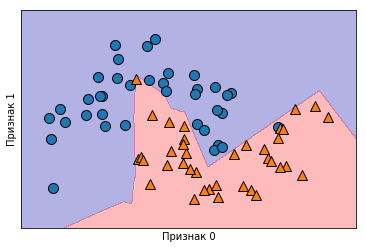

In [21]:
# использование двух скрытых слоев по 10 элементов в каждом 
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

Text(0,0.5,'Признак 1')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


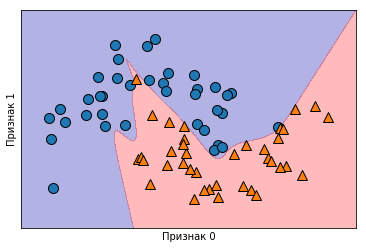

In [22]:
# использование двух скрытых слоев по 10 элементов в каждом, на этот раз с функцией tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


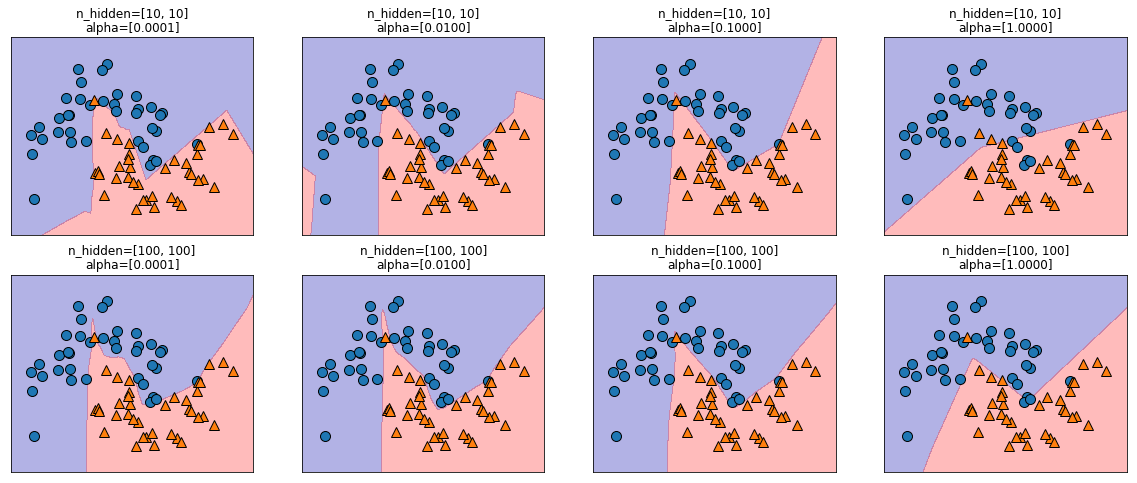

In [34]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden=[{}, {}]\nalpha=[{:.4f}]'.format(n_hidden_nodes, n_hidden_nodes, alpha))

In [51]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

print ("Правильность на обчущей выборке:{:.2f}".format(mlp.score(X_train, y_train)))
print ("Правильность на тестовой выборке:{:.2f}".format(mlp.score(X_test, y_test)))

Правильность на обчущей выборке:0.91
Правильность на тестовой выборке:0.91


In [52]:
# вычилсяем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis=0)
#вычисляем стандартное отклонение для каждого признака обучающей выборке
std_on_train = X_train.std(axis=0)
#вычитаес среднее и затем умножаем на обратную величину стандартного отклонения mean=0 & std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение обучающего набора)
# для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print ("Правильность на обчущей выборке:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print ("Правильность на тестовой выборке:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обчущей выборке:0.991
Правильность на тестовой выборке:0.965


C:\Sneg\Add.Program\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [53]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print ("Правильность на обчущей выборке:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print ("Правильность на тестовой выборке:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обчущей выборке:0.993
Правильность на тестовой выборке:0.972


In [54]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print ("Правильность на обчущей выборке:{:.3f}".format(mlp.score(X_train_scaled, y_train)))
print ("Правильность на тестовой выборке:{:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обчущей выборке:0.988
Правильность на тестовой выборке:0.972


C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


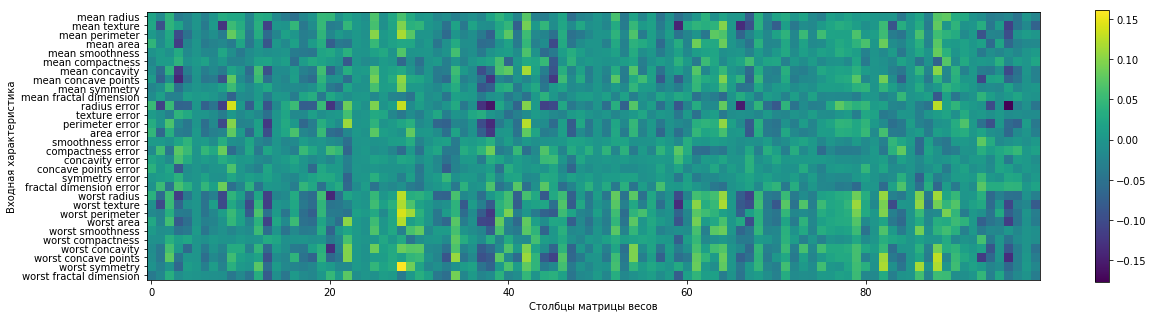

In [57]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Столбцы матрицы весов")
plt.ylabel('Входная характеристика')
plt.colorbar()